In [51]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import *
import math
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as img
from IPython.display import Image

In [52]:
with MPRester("uV0oAcDvINnFw7CK") as m:

    # Structure for material id
    bdstructure = m.get_phonon_bandstructure_by_material_id("mp-961711")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



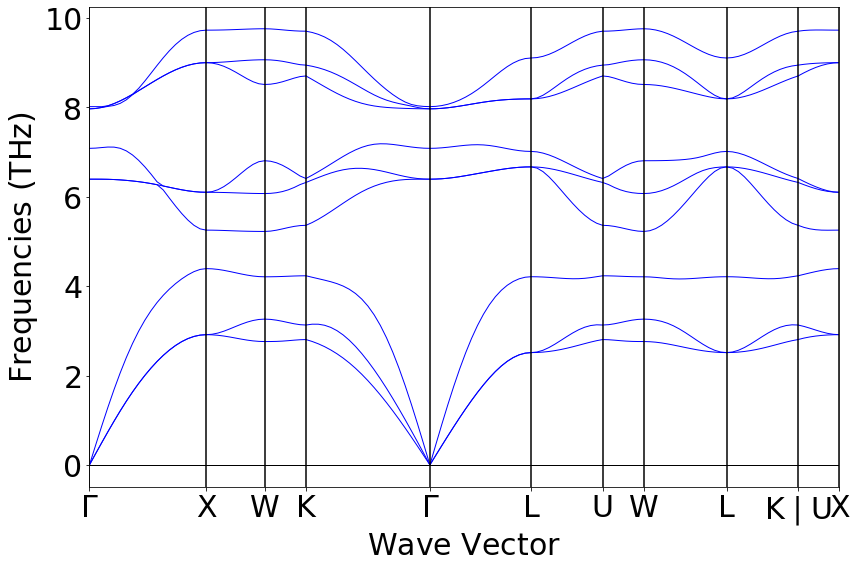

In [53]:
bsplotter = PhononBSPlotter(bdstructure)
bsplotter.show()

# Calcule de la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin.

### Zone de Brillouin:


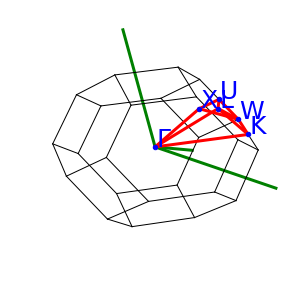

In [54]:
bsplotter.plot_brillouin()

### Calcule des vitesses:

La vitesse du son se trouve grace à l'équation vg = dω/dq (vitesse de grroupe) où ω est la fréquence angulaire (rad/s). Afin de calculer la dérivé de q nous pouvons prendre deux points de la branche acoustique. Avec ces deux points nous pouvons créer une droite qui approxime la pente de la bande accoustique.
Un petit facteur multiplicatif sera appliqué à vg afin d'obtenir la vitesse du son.

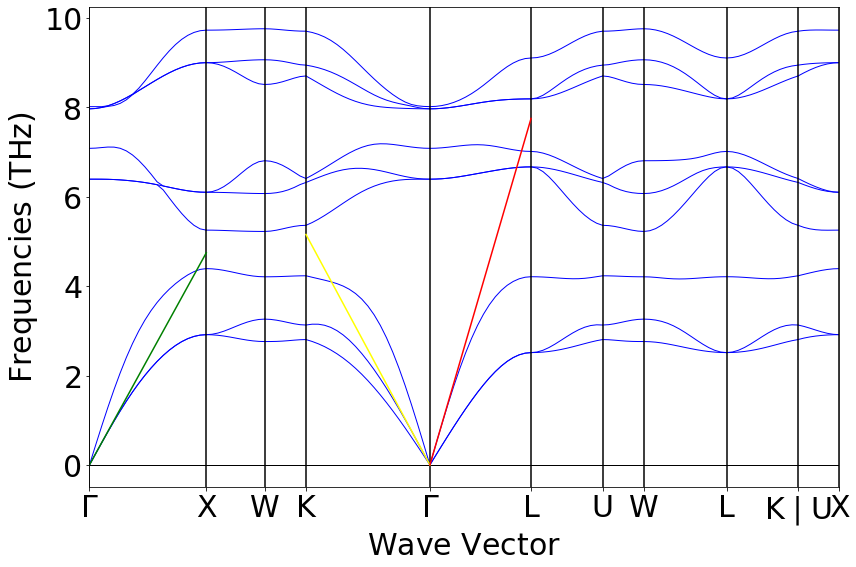

Vitesse du son pour la branche acoustique 1 =  2880.717310797825 [m/s]
Vitesse du son pour la branche acoustique 2 =  2950.5364565685813 [m/s]
Vitesse du son pour la branche acoustique 3 =  5433.729250141268 [m/s]


In [56]:
q1 = data.get('distances')[0]
q2 = data.get('distances')[3]
q3 = data.get('distances')[4]

f1 = data.get('frequency')[0][0]
f2 = data.get('frequency')[3][1]
f3 = data.get('frequency')[4][2]

x = np.array([[q1[0], q1[1]], [q2[-2], q2[-1]], [q3[0], q3[1]]])
y = np.array([[f1[0], f1[1]], [f2[-2], f2[-1]], [f3[0], f3[1]]])


coef = [0,0,0]
for i in range(0,3):
    coef[i] = np.polyfit(x[i], y[i], 1)
    
ab1 = np.linspace(q1[0],q1[-1],1000)
ab2 = np.linspace(q2[0],q2[-1],1000)
ab3 = np.linspace(q3[0],q3[-1],1000)

droite1 = coef[0][0]*ab1 + coef[0][1]
droite2 = coef[1][0]*ab2 + coef[1][1]
droite3 = coef[2][0]*ab3 + coef[2][1]


bsplotter.get_plot()
plt.plot(ab1, droite1, color='green')
plt.plot(ab2, droite2, color='yellow')
plt.plot(ab3, droite3, color='red')
plt.show()

fact_multi = (2*pi*1e12*1e-10)
v1 = np.abs(coef[0][0])* fact_multi
v2 = np.abs(coef[1][0])* fact_multi
v3 = np.abs(coef[2][0])* fact_multi


print("Vitesse du son pour la branche acoustique 1 = ", v1, "[m/s]")
print("Vitesse du son pour la branche acoustique 2 = ", v2, "[m/s]")
print("Vitesse du son pour la branche acoustique 3 = ", v3, "[m/s]")